In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import eval_hermite, factorial

plt.rcParams["font.family"] = "monospace"

In [2]:
def hermite_function(n, x):
    """
    Evaluates the hermite function of order n at a point x
    """
    coef = np.sqrt((2**n) * factorial(n) * np.sqrt(np.pi)) * np.exp(
        (x**2) / 2,
        dtype=np.float64,
    )
    # coef = np.exp((x**2) / 2, dtype=np.float64)
    return eval_hermite(n, x) / coef


def get_u_v_p(x, y, k, m, w, t=1):
    """
    Returns the u, v and p values for a given x, y, k, m and w
    only valid for m >= 1
    """
    wave_part = np.exp(1j * (k * x - w * t))
    v = hermite_function(m, y) * wave_part
    # u = -1j *((hermite_function(m+1, y)/(k-w)) - (hermite_function(m-1, y)*2*m/(w+k))) * wave_part /2
    # p = 1j *((hermite_function(m+1, y)/(k-w)) + (hermite_function(m-1, y)*2*m/(w+k))) * wave_part /2
    u = (
        -1j
        * (
            (m**0.5) * hermite_function(m - 1, y) / (w + k)
            + ((m + 1) ** 0.5) * hermite_function(m + 1, y) / (w - k)
        )
        * wave_part
        / (2**0.5)
    )
    p = (
        1j
        * (
            (m**0.5) * hermite_function(m - 1, y) / (w + k)
            - ((m + 1) ** 0.5) * hermite_function(m + 1, y) / (w - k)
        )
        * wave_part
        / (2**0.5)
    )
    return u.real, v.real, p.real


def w_lowfreq(k, m):
    """
    Returns the low frequency dispersion relation
    """
    return -k / (2 * m + 1 + k**2)


def w_highfreq(k, m):
    """
    Returns the high frequency dispersion relation
    """
    return np.sqrt(k**2 + 2 * m + 1)


def plot_structures(u, v, p, nondim_y, k, m, w, wave):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(u, nondim_y, c="b", label=r"$u'$", ls="-", lw=2)
    ax.plot(v, nondim_y, c="g", label=r"$v'$", ls="--", lw=2)
    ax.plot(p, nondim_y, c="r", label=r"$\phi'$", ls="-.", lw=2)
    ax.axhline(0, c="k", ls="--", lw=1, alpha=0.5)
    ax.set_ylim(-4, 4)
    ax.set_xlim(-1, 1)

    ax.legend()

    ax.set_ylabel(r"$y'$")

    ax.set_title(rf"{wave} wave at $k = {k}$, $m = {m}$, $w = {w:0.2f}$")

In [3]:
nondim_y = np.arange(-4, 4.1, 0.1)

# Kelvin wave

Text(0.5, 1.0, "Equatorial Kelvin wave at $k = 1$, $v' = 0$, $\\phi' = u'$")

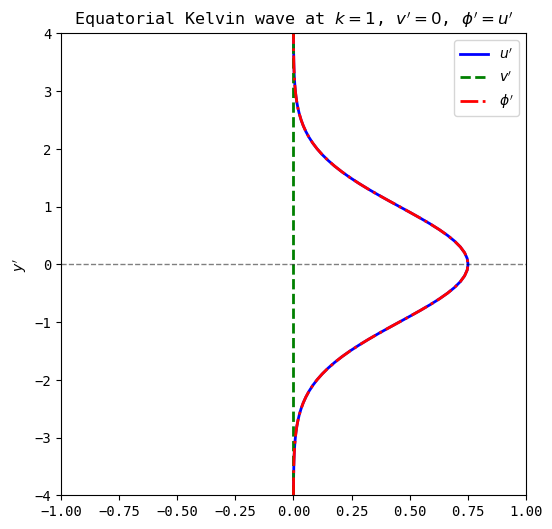

In [4]:
# Equatorial Kelvin wave at k = 1
# u_k = np.exp(-nondim_y**2 / 2)
u_k = hermite_function(0, nondim_y)
phi = u_k

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(u_k, nondim_y, c="b", label=r"$u'$", ls="-", lw=2)
ax.axvline(0, c="g", ls="--", lw=2, label=r"$v'$")
ax.plot(phi, nondim_y, c="r", label=r"$\phi'$", ls="-.", lw=2)
ax.axhline(0, c="k", ls="--", lw=1, alpha=0.5)
ax.set_ylim(-4, 4)
ax.set_xlim(-1, 1)

ax.legend()

ax.set_ylabel(r"$y'$")

ax.set_title(r"Equatorial Kelvin wave at $k = 1$, $v' = 0$, $\phi' = u'$")

# Rossby waves

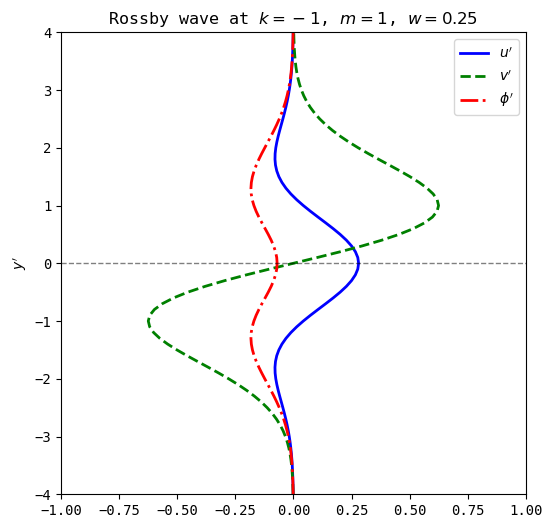

In [5]:
# Rossby wave at k = -1 and m = 1
m = 1
k = -1
w = w_lowfreq(k, m)
u, v, p = get_u_v_p(0, nondim_y, k, m, w)

plot_structures(u, v, p, nondim_y, k, m, w, "Rossby")

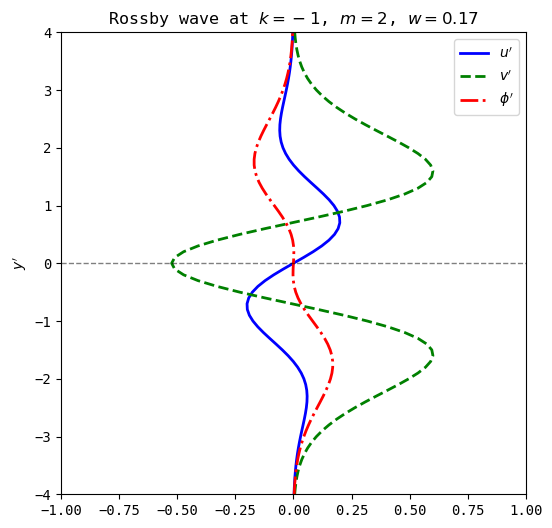

In [6]:
# Rossby wave at k = -1 and m = 2
m = 2
k = -1
w = w_lowfreq(k, m)
u, v, p = get_u_v_p(0, nondim_y, k, m, w)

plot_structures(u, v, p, nondim_y, k, m, w, "Rossby")

# Inertial-Gravity waves

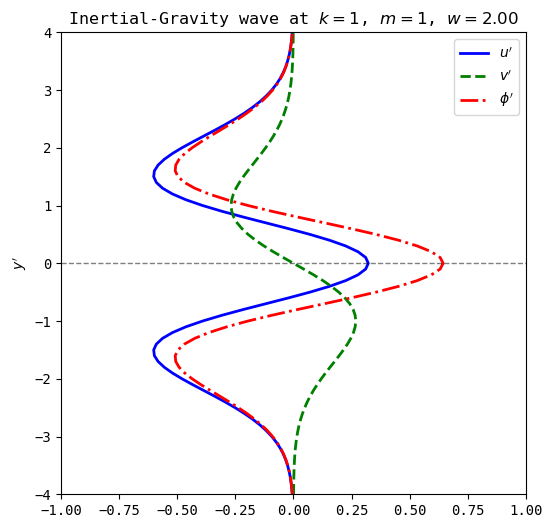

In [7]:
# Inertial Gravity Wave at k = 1 and m = 1
m = 1
k = 1
w = w_highfreq(k, m)
u, v, p = get_u_v_p(0, nondim_y, k, m, w)

plot_structures(u, v, p, nondim_y, k, m, w, "Inertial-Gravity")

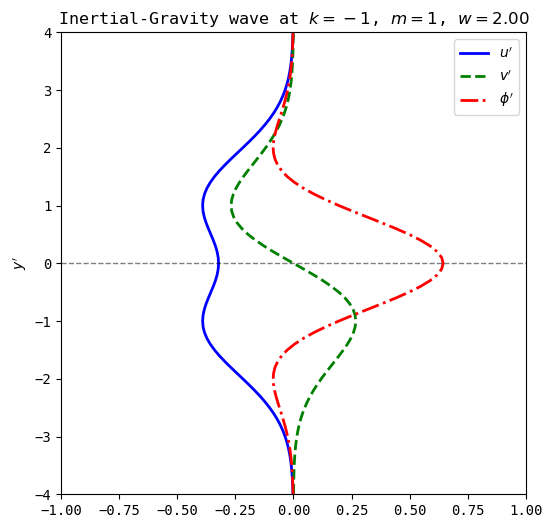

In [8]:
# Inertial Gravity Wave at k = -1 and m = 1
m = 1
k = -1
w = w_highfreq(k, m)
u, v, p = get_u_v_p(0, nondim_y, k, m, w)

plot_structures(u, v, p, nondim_y, k, m, w, "Inertial-Gravity")

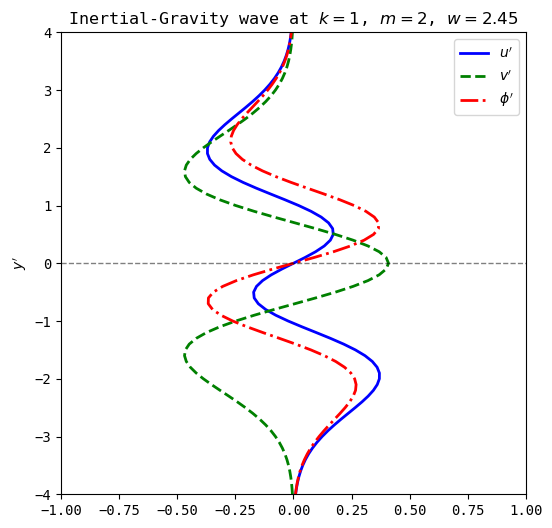

In [9]:
# Inertial Gravity Wave at k = 1 and m = 2
m = 2
k = 1
w = w_highfreq(k, m)
u, v, p = get_u_v_p(0, nondim_y, k, m, w)

plot_structures(u, v, p, nondim_y, k, m, w, "Inertial-Gravity")

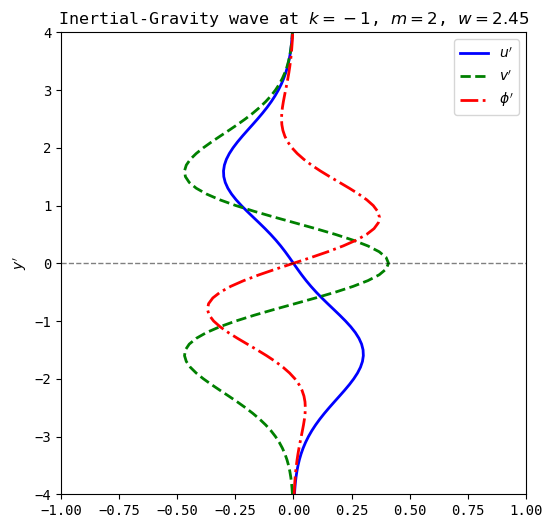

In [10]:
# Inertial Gravity Wave at k = -1 and m = 2
m = 2
k = -1
w = w_highfreq(k, m)
u, v, p = get_u_v_p(0, nondim_y, k, m, w)

plot_structures(u, v, p, nondim_y, k, m, w, "Inertial-Gravity")

# Equatorial mixed Rossby-gravity waves

In [11]:
def w_mixed(k):
    return np.roots([1, -k, -1])

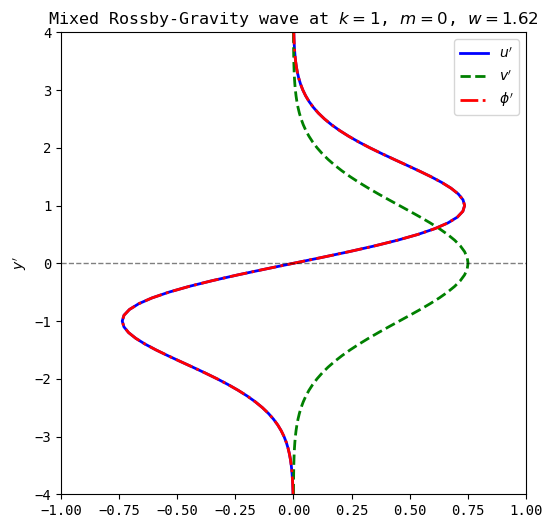

In [12]:
# equatorial mixed Rossby-gravity waves at k=1
k = 1
m = 0
w = w_mixed(k)
w = w[w > 0][0]
x = 0
t = 1

wave_part = np.exp(1j * (k * x - w * t))
v = hermite_function(0, nondim_y)
u = 1j * w * hermite_function(1, nondim_y) * wave_part / (2**0.5)
p = u

plot_structures(u.real, v, p.real, nondim_y, k, m, w, "Mixed Rossby-Gravity")

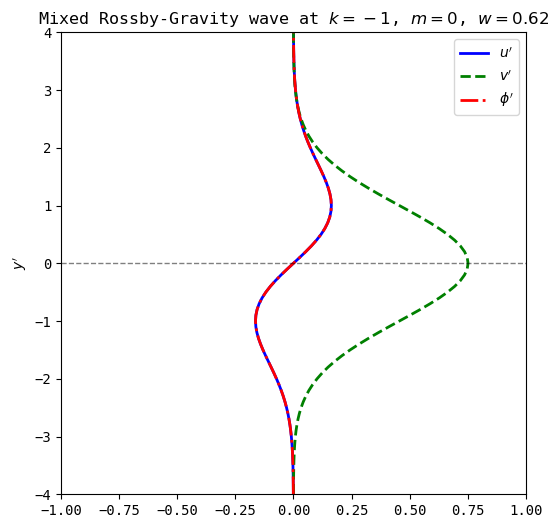

In [13]:
# equatorial mixed Rossby-gravity waves at k=-1
k = -1
m = 0
w = w_mixed(k)
w = w[w > 0][0]
x = 0
t = 1

wave_part = np.exp(1j * (k * x - w * t))
v = hermite_function(0, nondim_y)
u = 1j * w * hermite_function(1, nondim_y) * wave_part / (2**0.5)
p = u

plot_structures(u.real, v, p.real, nondim_y, k, m, w, "Mixed Rossby-Gravity")